<h1>Lending Club</h1>

Analysis of applicant to understand the driving factors for loan analysis

Approach:

1) Data Understanding 
    - Reading the data 
    - Checking datatypes of different column
    - Correcting the datatypes
    - Identifing the columns that refer Default/Not Default
    
2) Data Cleaning 
    - checking Missing value %
    - based on % if >70-80% data is missing drop column or if less than impute the data
    - Impute Stategy : Mode for Categorical data and mean(No outlier)/Median(outliers) for Numeric data
 
3) Data Analysis
    - Univariate Analysis
    - Bivariate Analysis
    
4) Based on Analyis, concluding the driving factor and providing recommendation     

In [1]:
# Understanding the Data

#import the libraries
import pandas as pd
import numpy as np

#Import companies csv
#encoding provided due to utf-8 encoding error
#low_memory=False -Added as Jupyter alert suggestion
loan=pd.read_csv("loan.csv",low_memory=False)


In [2]:
#Check Shape
loan.shape

(39717, 111)

In [3]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
# Print the full summary of the dataframe with null count included
loan.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [5]:
# null value in Percentage
missing_values_loan=round(100*(loan.isnull().sum()/len(loan.id)), 2)
#missing_values_loan > 0
missing_values_loan.loc[missing_values_loan > 0]


emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [6]:
#Drop data that has more than 60% of missing value
missing_values_col = list(missing_values_loan[missing_values_loan >= 60].index)
loan = loan.drop(missing_values_col,axis=1)
loan.shape

(39717, 54)

In [7]:
#Null Check in new data 
missingValues_AfterCleanse = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missingValues_AfterCleanse

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [8]:
#Check NonZero Value
missingValues_AfterCleanse[missingValues_AfterCleanse!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [9]:
#Desc Around 32.5% missing value. load.head() did'nt display column, Checked in Excel first. Printing it for reviewer:
loan['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [10]:
#Removing desc as well, doesn't seems to be helpful in analysis
loan = loan.drop('desc',axis=1)

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
#checking unique values:
for col in loan.columns:
    print(col)
    print(len(loan[col].unique()))

id
39717
member_id
39717
loan_amnt
885
funded_amnt
1041
funded_amnt_inv
8205
term
2
int_rate
371
installment
15383
grade
7
sub_grade
35
emp_title
28821
emp_length
12
home_ownership
5
annual_inc
5318
verification_status
3
issue_d
55
loan_status
3
pymnt_plan
1
url
39717
purpose
14
title
19616
zip_code
823
addr_state
50
dti
2868
delinq_2yrs
11
earliest_cr_line
526
inq_last_6mths
9
open_acc
40
pub_rec
5
revol_bal
21711
revol_util
1090
total_acc
82
initial_list_status
1
out_prncp
1137
out_prncp_inv
1138
total_pymnt
37850
total_pymnt_inv
37518
total_rec_prncp
7976
total_rec_int
35148
total_rec_late_fee
1356
recoveries
4040
collection_recovery_fee
2616
last_pymnt_d
102
last_pymnt_amnt
34930
last_credit_pull_d
107
collections_12_mths_ex_med
2
policy_code
1
application_type
1
acc_now_delinq
1
chargeoff_within_12_mths
2
delinq_amnt
1
pub_rec_bankruptcies
4
tax_liens
2


In [13]:
print("unique emp_length:") 
print(loan.emp_length.unique())
print("unique collections_12_mths_ex_med")  
print(loan.collections_12_mths_ex_med.unique())
print("unique chargeoff_within_12_mths")  
print(loan.chargeoff_within_12_mths.unique())
print("unique pub_rec_bankruptcies")  
print(loan.pub_rec_bankruptcies.unique())
print("unique delinq_amnt")  
print(loan.delinq_amnt.unique())
print("unique acc_now_delinq")  
print(loan.acc_now_delinq.unique())
print("unique application_type")  
print(loan.application_type.unique())
print("unique policy_code")  
print(loan.policy_code.unique())
print("unique pymnt_plan")  
print(loan.pymnt_plan.unique())
print("unique initial_list_status")  
print(loan.initial_list_status.unique())
print("unique home_ownership")  
print(loan.home_ownership.unique())
print("unique tax_liens")  
print(loan.tax_liens.unique())

unique emp_length:
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
unique collections_12_mths_ex_med
[ 0. nan]
unique chargeoff_within_12_mths
[ 0. nan]
unique pub_rec_bankruptcies
[ 0.  1.  2. nan]
unique delinq_amnt
[0]
unique acc_now_delinq
[0]
unique application_type
['INDIVIDUAL']
unique policy_code
[1]
unique pymnt_plan
['n']
unique initial_list_status
['f']
unique home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
unique tax_liens
[ 0. nan]


In [14]:
# out of above list deleteing few columns which is not adding up any sense in data due to same values
loan=loan.drop(['delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths','tax_liens', 'collections_12_mths_ex_med', 'member_id', 'id', 'url'], axis=1)

In [15]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [17]:
print("unique emp_title:") 
print(loan.emp_title.unique())
print("unique installment")  
print(loan.installment.unique())

unique emp_title:
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
unique installment
[162.87  59.83  84.33 ...  78.42 275.38 255.43]


In [18]:
#Removing emo_title-The job title supplied by the Borrower when applying for the loan.* 
#It has so many unique value that i don't think will contribute to analysis
loan=loan.drop(['emp_title'], axis=1)

In [19]:
#missing data check
round(100*(loan.isnull().sum()/len(loan)), 2).sort_values(ascending=False)

emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
annual_inc                 0.00
zip_code                   0.00
purpose                    0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
funded_amnt                0.00
addr_state                 0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
home_ownership             0.00
delinq_2yrs                0.00
dti                        0.00
earliest_cr_line           0.00
last_pymnt_amnt            0.00
collection_recovery_fee    0.00
recoveries                 0.00
total_rec_late_fee         0.00
total_rec_int              0.00
total_rec_prncp            0.00
total_pymnt_inv            0.00
total_py

In [20]:
loan['term'] = loan['term'].str.replace('months', '')
loan['int_rate'] = loan['int_rate'].str.replace('%', '')
loan['emp_length'] = loan['emp_length'].str.replace('years', '')
loan['emp_length'] = loan['emp_length'].str.replace('year', '')
loan['emp_length'] = loan['emp_length'].str.replace('+', '')
loan['emp_length'] = loan['emp_length'].str.replace('<', '')


In [21]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [22]:
loan['revol_util'] = loan['revol_util'].str.replace('%', '')
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [23]:
#Creating Derived Column to separate Date : issue_d, earliest_cr_line-, last_pymnt_d, last_credit_pull_d
#The month which the loan was funded
loan['issue_month']= loan['issue_d'].str.split('-').str[0]
loan['issue_year']= loan['issue_d'].str.split('-').str[1]
loan['issue_year'] = '20' + loan['issue_year']

#looking at data Dict I think other can be dropped earliest_cr_line-, last_pymnt_d, last_credit_pull_d
loan=loan.drop(['earliest_cr_line','last_pymnt_d','last_credit_pull_d'], axis=1)
loan.head(12)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,1,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,Dec,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Dec,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,2,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,Dec,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,1,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Dec,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,Dec,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,3,9,0,7963,28.30,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Dec,2011
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,1,7,0,17726,85.60,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,Dec,2011
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0,2,4,0,8221,87.50,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,0.0,Dec,2011
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,2,11,0,5210,32.60,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39,0.0,Dec,2011
9,5375,5375,5350.0,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Dec-11,Charged Off,other,Building my credit history.,774xx,TX,18.08,0,0,2,0,9279,36.50,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45,0.0,Dec,2011


In [24]:
loan=loan.drop(['issue_d'], axis=1)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  purpose                  39717 non-null  object 
 14  title                 

In [25]:
#Loan amount and funded amt is almost same, Can be dropped
loan=loan.drop(['funded_amnt'], axis=1)
#addr_state will give idea, no need to map state analysis using Zip. redundant data can be removed
loan=loan.drop(['zip_code'], axis=1)
#For lending analysis loan_status should be paid or charged off, 
#Current would not help as it is running and there is no way to know if it will be paid or defaulted
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
#funded_amnt_inv won't be available during decision making
loan=loan.drop(['funded_amnt_inv'], axis=1)

loan.head(12)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0,1,3,0,13648,83.70,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,Dec,2011
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0,5,3,0,1687,9.40,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Dec,2011
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,0,2,2,0,2956,98.50,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,Dec,2011
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,0,1,10,0,5598,21,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Dec,2011
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,3,9,0,7963,28.30,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Dec,2011
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Loan,NC,23.51,0,1,7,0,17726,85.60,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,Dec,2011
7,3000,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Fully Paid,car,Car Downpayment,CA,5.35,0,2,4,0,8221,87.50,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,0.0,Dec,2011
8,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,2,11,0,5210,32.60,13,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39,0.0,Dec,2011
9,5375,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Charged Off,other,Building my credit history.,TX,18.08,0,0,2,0,9279,36.50,3,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45,0.0,Dec,2011
10,6500,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,High intrest Consolidation,AZ,16.12,0,2,14,0,4032,20.60,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,1655.54,0.0,Dec,2011


In [26]:
#Title could be deleted as purpose is present
loan=loan.drop(['title'], axis=1)
loan.head(12)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,Dec,2011
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Dec,2011
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,Dec,2011
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Dec,2011
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.30,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Dec,2011
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,NC,23.51,0,1,7,0,17726,85.60,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,Dec,2011
7,3000,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Fully Paid,car,CA,5.35,0,2,4,0,8221,87.50,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,0.0,Dec,2011
8,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,0,2,11,0,5210,32.60,13,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39,0.0,Dec,2011
9,5375,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0,0,2,0,9279,36.50,3,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45,0.0,Dec,2011
10,6500,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,AZ,16.12,0,2,14,0,4032,20.60,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,1655.54,0.0,Dec,2011


In [27]:
print(loan.delinq_2yrs.unique())
print(loan.pub_rec.unique())
print(loan.out_prncp.unique())
print(loan.out_prncp_inv.unique())
print(loan.pub_rec_bankruptcies.unique())

[ 0  2  3  1  4  6  5  8  7  9 11]
[0 1 2 3 4]
[0.]
[0.]
[ 0.  1.  2. nan]


In [28]:
#out_prncp and out_prncp_inv is not required.
loan=loan.drop(['out_prncp'], axis=1)
loan=loan.drop(['out_prncp_inv'], axis=1)
loan.head(12)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,Dec,2011
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Dec,2011
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,Dec,2011
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Dec,2011
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.30,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Dec,2011
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,NC,23.51,0,1,7,0,17726,85.60,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,Dec,2011
7,3000,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Fully Paid,car,CA,5.35,0,2,4,0,8221,87.50,4,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,0.0,Dec,2011
8,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,0,2,11,0,5210,32.60,13,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39,0.0,Dec,2011
9,5375,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0,0,2,0,9279,36.50,3,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45,0.0,Dec,2011
10,6500,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,AZ,16.12,0,2,14,0,4032,20.60,23,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,1655.54,0.0,Dec,2011


In [29]:
#Null Check in new data 
round(100*(loan.isnull().sum()/len(loan)), 2).sort_values(ascending=False)


emp_length                 2.68
pub_rec_bankruptcies       1.81
revol_util                 0.13
home_ownership             0.00
addr_state                 0.00
purpose                    0.00
loan_status                0.00
verification_status        0.00
annual_inc                 0.00
issue_year                 0.00
delinq_2yrs                0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
dti                        0.00
inq_last_6mths             0.00
issue_month                0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pymnt_amnt            0.00
loan_amn

In [30]:
loan['emp_length']=loan['emp_length'].fillna(10)
loan.emp_length = loan.emp_length.astype("int32")
loan.emp_length.describe()

count    38577.000000
mean         5.193302
std          3.449311
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [31]:
loan.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [32]:
median=loan['pub_rec_bankruptcies'].median()
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(median)
#Null Check in new data 
round(100*(loan.isnull().sum()/len(loan)), 2).sort_values(ascending=False)

revol_util                 0.13
issue_year                 0.00
delinq_2yrs                0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
inq_last_6mths             0.00
issue_month                0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pymnt_amnt            0.00
pub_rec_bankruptcies       0.00
loan_amn

In [33]:
#remove revol_util as revol_bal is available
loan=loan.drop(['revol_util'], axis=1)
loan.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,Dec,2011
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Dec,2011
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,Dec,2011
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Dec,2011
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Dec,2011
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,NC,23.51,0,1,7,0,17726,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,Dec,2011
7,3000,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Fully Paid,car,CA,5.35,0,2,4,0,8221,4,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,0.0,Dec,2011
8,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,0,2,11,0,5210,13,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39,0.0,Dec,2011
9,5375,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0,0,2,0,9279,3,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45,0.0,Dec,2011
10,6500,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,AZ,16.12,0,2,14,0,4032,23,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,1655.54,0.0,Dec,2011


<h1>Analysis Start</h1>

Below Steps are complete:     
1) Data Understanding - Reading the data - Checking datatypes of different column - Correcting the datatypes - Identifing the columns that refer Default/Not Default

2) Data Cleaning - checking Missing value % - based on % if >70-80% data is missing drop column or if less than impute the data - Impute Stategy : Mode for Categorical data and mean(No outlier)/Median(outliers) for Numeric data    

In [34]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,Dec,2011
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Dec,2011
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,Dec,2011
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Dec,2011
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Dec,2011


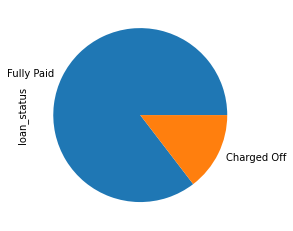

In [35]:
#Looking at the dataframe, lets see the count of defaulted vs Paid
import matplotlib.pyplot as plt
%matplotlib inline
loan['loan_status'].value_counts().plot.pie()
plt.show()

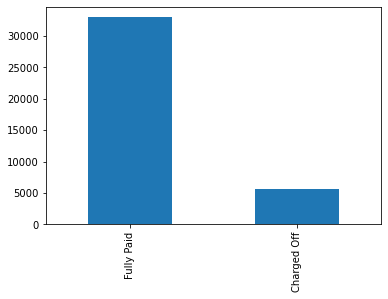

In [36]:
loan['loan_status'].value_counts().plot.bar()
plt.show()

Inference : 
1. Most Loans are paid 
2. Data is Imbalance.

In [37]:
#Lets Create a data frame to analyze only default
loan_default=loan[loan['loan_status']=='Charged Off']
loan_default.head(12)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,119.66,0.0,Dec,2011
8,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,0,2,11,0,5210,13,646.02,646.02,162.02,294.94,0.00,189.06,2.0900,152.39,0.0,Dec,2011
9,5375,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0,0,2,0,9279,3,1476.19,1469.34,673.48,533.42,0.00,269.29,2.5200,121.45,0.0,Dec,2011
12,9000,36,13.49,305.38,C,C1,1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,0,1,4,0,10452,9,2270.70,2270.70,1256.14,570.26,0.00,444.30,4.1600,305.38,0.0,Dec,2011
14,10000,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,0,2,14,0,11997,29,7471.99,7471.99,5433.47,1393.42,0.00,645.10,6.3145,325.74,0.0,Dec,2011
21,21000,36,12.42,701.73,B,B4,10,RENT,105000.0,Verified,Charged Off,debt_consolidation,FL,13.22,0,0,7,0,32135,38,14025.40,14025.40,10694.96,3330.44,0.00,0.00,0.0000,701.73,0.0,Dec,2011
24,6000,36,11.71,198.46,B,B3,1,RENT,76000.0,Not Verified,Charged Off,major_purchase,CA,2.40,0,1,7,0,5963,7,2050.14,2050.14,1305.58,475.25,0.00,269.31,2.5700,198.46,0.0,Dec,2011
26,15000,36,14.27,514.64,C,C2,9,RENT,60000.0,Not Verified,Charged Off,debt_consolidation,NY,15.22,0,1,7,0,5872,11,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,Dec,2011
27,5000,60,16.77,123.65,D,D2,2,RENT,50004.0,Not Verified,Charged Off,other,PA,13.97,3,0,14,0,4345,22,1609.12,1609.12,629.05,719.11,0.00,260.96,2.3000,123.65,0.0,Dec,2011
46,5000,36,8.90,158.77,A,A5,10,MORTGAGE,100000.0,Source Verified,Charged Off,debt_consolidation,OH,16.33,0,0,17,0,74351,35,5021.37,5021.37,4217.38,696.99,0.00,107.00,1.0700,158.77,0.0,Dec,2011


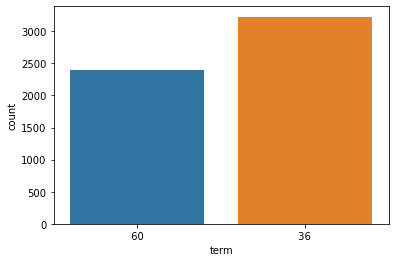

In [38]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#Lets check which term has most defaults
sns.countplot(data=loan_default, x="term")
plt.show()

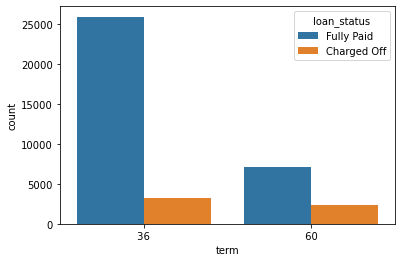

In [39]:
sns.countplot(data=loan,hue='loan_status', x="term")
plt.show()

Inference : if we see only % of default loans, the shorter term has more default than longer term. But when we see the whole picture, In loan distribution process the defaulted loan percentage is more in longer term if fully paid is considered. 

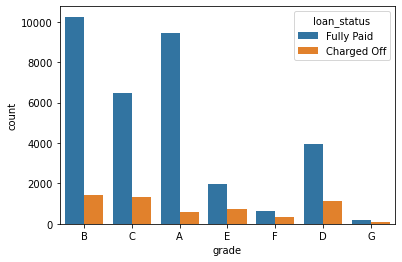

In [40]:
sns.countplot(data=loan,hue='loan_status', x="grade")
plt.show()

Larger picture(When fully paid) doesn't make much for grade analysis, So only Defaulted should be analysed.

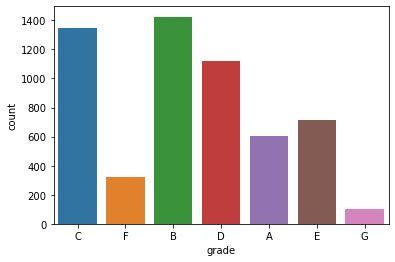

In [41]:
sns.countplot(x='grade', data=loan_default)
plt.show()

Inference: Most of the default loans have grade of B, C and D.

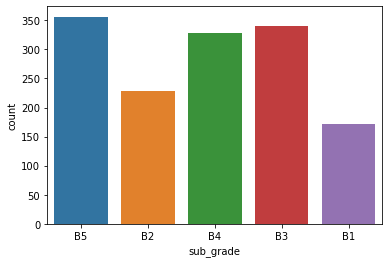

In [42]:
#Subgrade Test
loan_default_subgrade_B=loan_default[loan_default.grade.isin(['B'])]
loan_default_subgrade_C=loan_default[loan_default.grade.isin(['C'])]
loan_default_subgrade_D=loan_default[loan_default.grade.isin(['D'])]
sns.countplot(x='sub_grade', data=loan_default_subgrade_B)
plt.show()

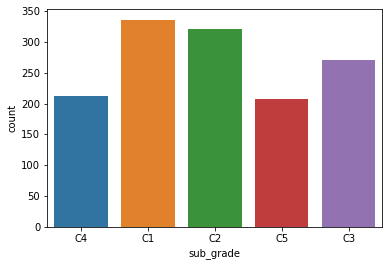

In [43]:
sns.countplot(x='sub_grade', data=loan_default_subgrade_C)
plt.show()

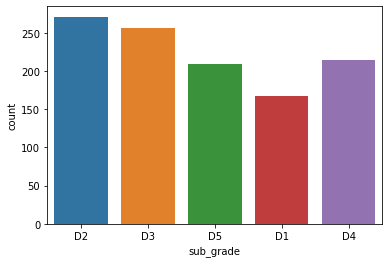

In [44]:
sns.countplot(x='sub_grade', data=loan_default_subgrade_D)
plt.show()

Inference : In Top 3 defaulting grade, we can rule out that the subgrade has a pattern within them which can be group by.
Example : in B subgrade b3,b4 and b5 has more defaults, In C subgrade C1, C2 and C3 has more defaults while in D subgrade D2 and D3 have more defaults. So it is difficult to understand the pattern within these subgrades and Hence shouldn't be considerred as a driving factor.

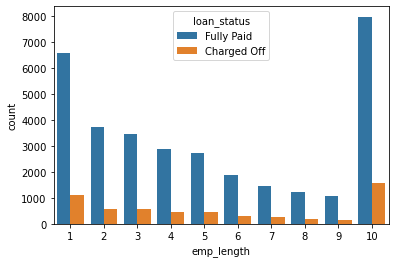

In [45]:
#lets Check Employment length 
sns.countplot(x='emp_length',hue='loan_status', data=loan)
plt.show()

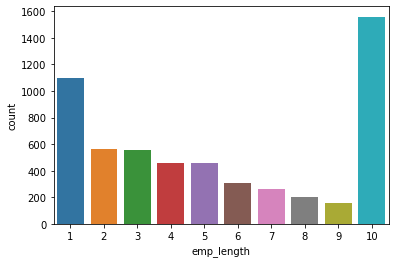

In [46]:
sns.countplot(x='emp_length', data=loan_default)
plt.show()

Inference : As employment years increases,no of loan defaulter decreases. There is a Sharp rise in 10 years as 10+ years of service is grouped together into 10 segment. So we can ignore 10.

In [47]:
#lets see how does annual income affect
loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

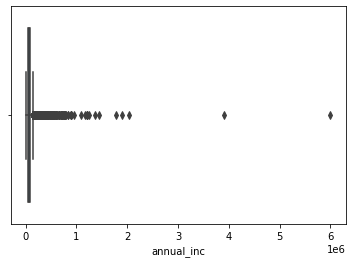

In [48]:
#box plot to check Outliers
sns.boxplot(x=loan['annual_inc'])
plt.show()

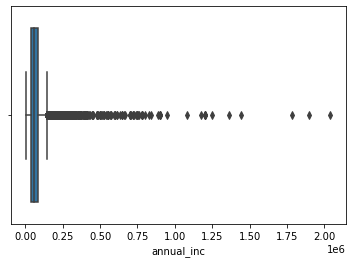

In [49]:
#box plot to check Outliers
loan2=loan[loan['annual_inc']<3000000]
sns.boxplot(x=loan2['annual_inc'])
plt.show()

In [50]:
loan2.annual_inc.describe()

count    3.857500e+04
mean     6.852490e+04
std      5.321343e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.885256e+04
75%      8.200000e+04
max      2.039784e+06
Name: annual_inc, dtype: float64

Inference : Median population has 58852.56 income is considering loan

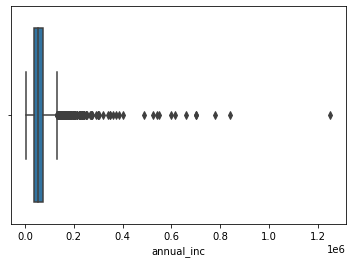

In [51]:
#box plot to check Outliers  
sns.boxplot(x=loan_default['annual_inc'])
plt.show()

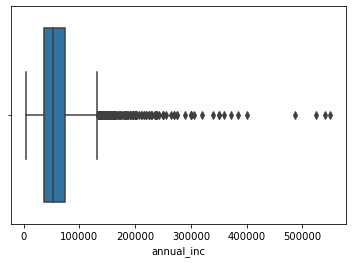

In [52]:
#box plot to check Outliers  
loan2_default=loan_default[loan_default['annual_inc']<600000]
sns.boxplot(x=loan2_default['annual_inc'])
plt.show()

In [53]:
loan2_default.annual_inc.describe()

count      5619.000000
mean      61422.379817
std       38989.762200
min        4080.000000
25%       37000.000000
50%       53000.000000
75%       75000.000000
max      550000.000000
Name: annual_inc, dtype: float64

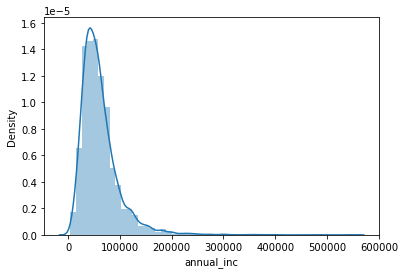

In [54]:
sns.distplot(loan2_default.annual_inc)
plt.show()

Inference: Most defaults have Annual income of 500000


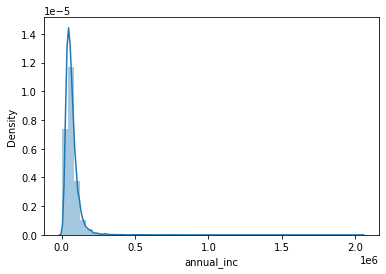

In [55]:
sns.distplot(loan2.annual_inc)
plt.show()

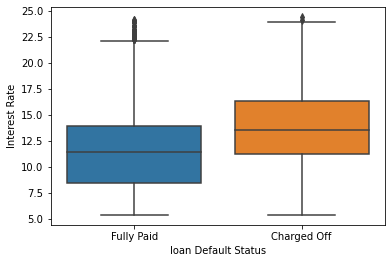

In [56]:
# last analysis with int rate
loan.int_rate = loan.int_rate.astype("float64")
sns.boxplot(y='int_rate', x='loan_status', data=loan)
plt.ylabel('Interest Rate')
plt.xlabel('loan Default Status')
plt.show()

Inference: Lower interest rates loans are paid in full and higher is defaulted 

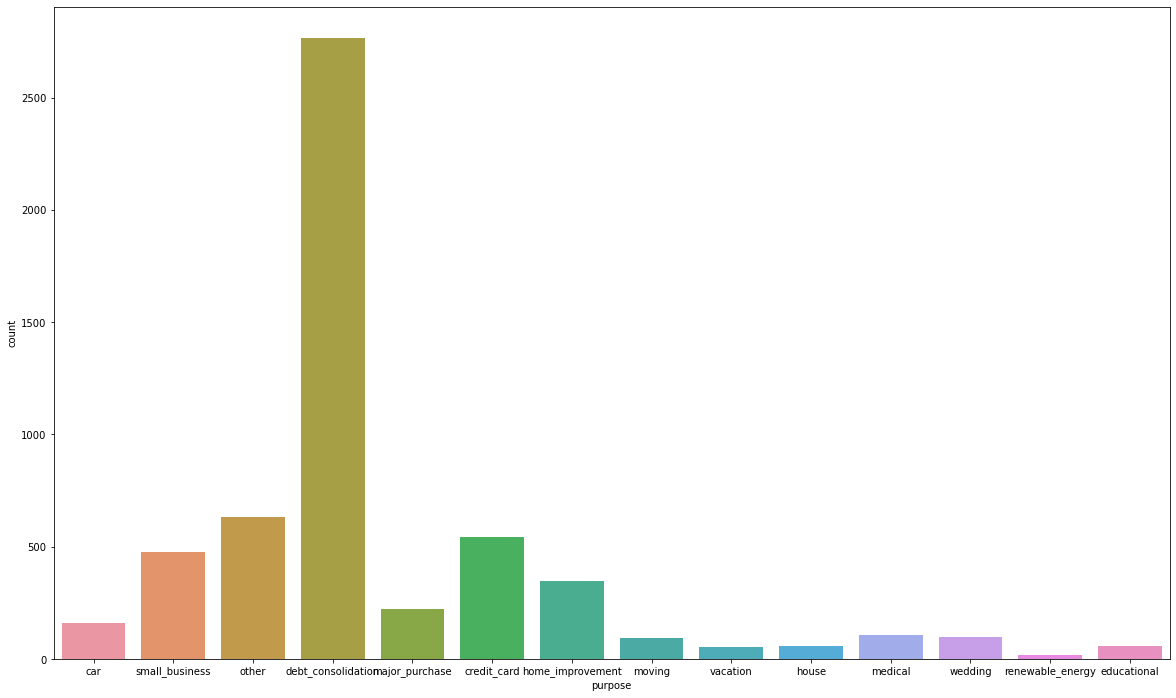

In [57]:
#Purpose which have maximum defaulted loans
plt.figure(figsize=(20,12))
sns.countplot(x='purpose', data=loan_default)
plt.show()

Debt_Consolidated is the major Purpose. to analyse furture let's remove it 

In [58]:
loan_default_minusDebt = loan_default[loan_default.purpose != 'debt_consolidation']

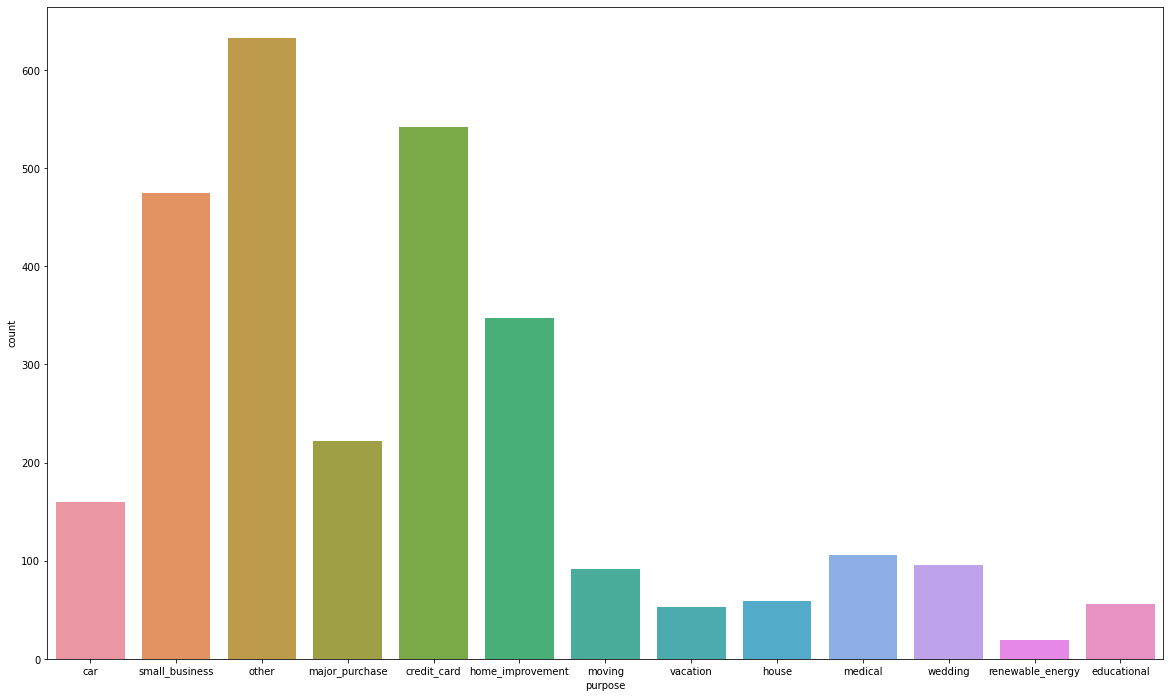

In [59]:
#Purpose which have maximum defaulted loans
plt.figure(figsize=(20,12))
sns.countplot(x='purpose', data=loan_default_minusDebt)
plt.show()

inference: Small Business, Credit card and home improvement are prominent purpose of default

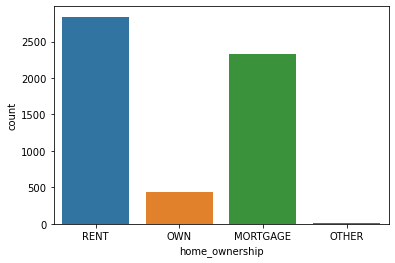

In [60]:
# If type of residence is a factor
sns.countplot(x='home_ownership', data=loan_default)
plt.show()

Inference : Renters and people with Mortgage are more prone to default 

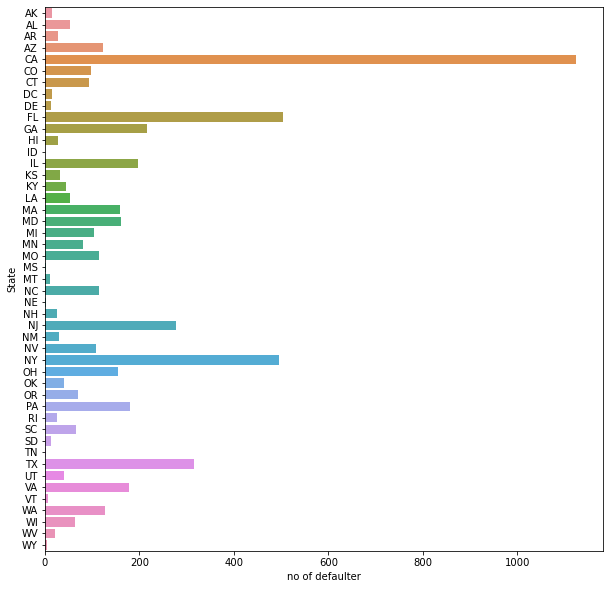

In [61]:
#State Analysis
df = loan_default.groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=df)
plt.xlabel('no of defaulter')
plt.ylabel('State')
plt.show()

Inference: California, Florida and New york has Most number of Defaulters

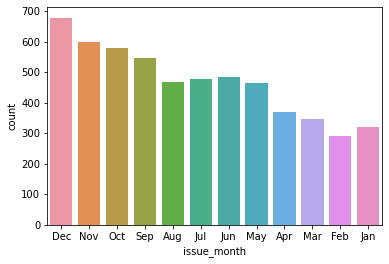

In [62]:
#Month Analysis 
sns.countplot(x='issue_month', data=loan_default)
plt.show()

In [63]:
loan_default.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,4,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,119.66,0.0,Dec,2011
8,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,0,2,11,0,5210,13,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,152.39,0.0,Dec,2011
9,5375,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0,0,2,0,9279,3,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,121.45,0.0,Dec,2011
12,9000,36,13.49,305.38,C,C1,1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,0,1,4,0,10452,9,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,305.38,0.0,Dec,2011
14,10000,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,0,2,14,0,11997,29,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,325.74,0.0,Dec,2011
21,21000,36,12.42,701.73,B,B4,10,RENT,105000.0,Verified,Charged Off,debt_consolidation,FL,13.22,0,0,7,0,32135,38,14025.40,14025.40,10694.96,3330.44,0.0,0.00,0.0000,701.73,0.0,Dec,2011
24,6000,36,11.71,198.46,B,B3,1,RENT,76000.0,Not Verified,Charged Off,major_purchase,CA,2.40,0,1,7,0,5963,7,2050.14,2050.14,1305.58,475.25,0.0,269.31,2.5700,198.46,0.0,Dec,2011
26,15000,36,14.27,514.64,C,C2,9,RENT,60000.0,Not Verified,Charged Off,debt_consolidation,NY,15.22,0,1,7,0,5872,11,0.00,0.00,0.00,0.00,0.0,0.00,0.0000,0.00,0.0,Dec,2011
27,5000,60,16.77,123.65,D,D2,2,RENT,50004.0,Not Verified,Charged Off,other,PA,13.97,3,0,14,0,4345,22,1609.12,1609.12,629.05,719.11,0.0,260.96,2.3000,123.65,0.0,Dec,2011
46,5000,36,8.90,158.77,A,A5,10,MORTGAGE,100000.0,Source Verified,Charged Off,debt_consolidation,OH,16.33,0,0,17,0,74351,35,5021.37,5021.37,4217.38,696.99,0.0,107.00,1.0700,158.77,0.0,Dec,2011


Inference : During Year end if loan is issued, Most loans are defaulted.

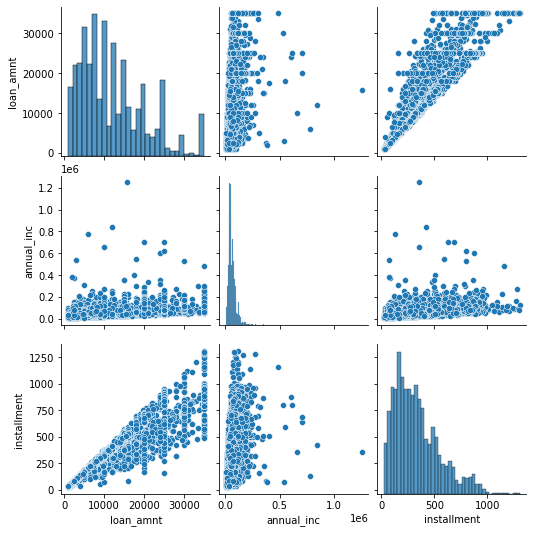

In [64]:
columns = ['loan_amnt','annual_inc', 'installment']
sns.pairplot(loan_default[columns])

plt.show()

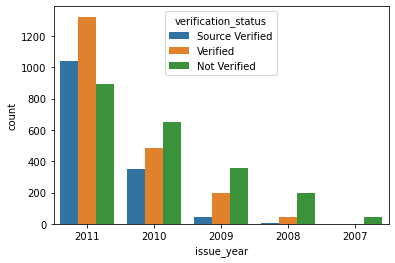

In [65]:
sns.countplot(data=loan_default, x='issue_year',hue='verification_status')
plt.show()

Inference: Verified has more defaulters but not certain

End Summary : Most of the data has been summarised using univariant but in reality it is bi variant as the data was already extracted for defaulters specifically